In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torchvision.utils as vutils
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms


from PIL import Image
import pandas as pd
from icecream import ic
import cv2

e:\Programe\Anaconda\envs\Pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Gender Recognition Network

## CGAN-64

In [16]:
from Models.CGAN_64x64.discriminator_test import Discriminator
from Models.CGAN_64x64.generator_test import Generator
from GenderRecognNetwork.network import CNN

image_shape = [3,128,128]

def gender_recogn(base_path = 'E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_128x128',img_size=128,attribute=0, display = 0):
        model = CNN(2, image_shape)
        model.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\GenderRecognNetwork\old_model.pt'))
        model.eval()

        transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize([128,128]),
                transforms.ToTensor()])

        dim_zgomot = 100

        retea_G = Generator(dim_zgomot=dim_zgomot, img_size=img_size)
        # attribute = 1

        retea_G.load_state_dict(torch.load(base_path + '\\retea_Generator.pt'))
        retea_G.cuda()
        retea_G.eval()

        esantioane_proba = torch.randn(1, dim_zgomot, 1, 1)
        etichete_proba = torch.FloatTensor([[attribute]])

        etichete_proba = etichete_proba.to(torch.device('cuda'))
        esantioane_proba = esantioane_proba.to(torch.device('cuda'))

        imagini_generate = retea_G(esantioane_proba, etichete_proba).detach()
        imagini_generate = torch.squeeze(imagini_generate, 0)
        imagini_generate = imagini_generate.to(torch.device('cpu'))
        img_generata = np.transpose(imagini_generate,(1,2,0))
        input_image = transform(imagini_generate)
        input_image = input_image.view(1,input_image.size(0),input_image.size(1),input_image.size(2))

        output = model.forward(input_image)
        output = output.detach().numpy()

        predicted_label_index = np.argmax(output, axis=1)
        # predicted_label = output.detach().numpy()
        predicted_label = output[0][predicted_label_index]
        test_image_predicted_label = "Male" if predicted_label_index == 1 else "Female" 

        if display == 1:
                ic(output)
                ic(predicted_label)
                ic(predicted_label_index)
                plt.figure()
                plt.imshow(img_generata)
                plt.title("Real : {}  Predicted: {}".format(attribute, test_image_predicted_label))
        
                return predicted_label  
        if display == 2:
                return predicted_label  

        if display == 0:
                return predicted_label_index

ic| output: array([[0.05736707, 0.88625246]], dtype=float32)
ic| predicted_label: array([0.88625246], dtype=float32)
ic| predicted_label_index: array([1], dtype=int64)


0.88625246


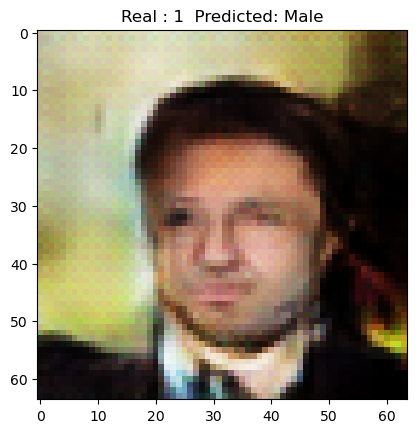

In [21]:
path1='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_64x64\\15epoci'
label = gender_recogn(base_path=path1, img_size=64, attribute=1,display=1)
print(label[0])
# label = gender_recogn(base_path=path1, img_size=64, attribute=0.7,display=1)
# label = gender_recogn(base_path=path1, img_size=64, attribute=0,display=1)



In [4]:

def test_model(numberOfSamples=10, attr = 0):
    path1='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_64x64\\40epoci'
    sum = 0
    for i in range(numberOfSamples):
        label = gender_recogn(base_path=path1, img_size=64, attribute=attr,display=2)
        sum += label[0]
    
    accuracy = (sum / numberOfSamples) * 100

    return accuracy

acc = test_model(numberOfSamples=5, attr=0)
print(f"Accuracy  - Female attribute: {acc} %")

acc = test_model(numberOfSamples=5, attr=1)
print(f"Accuracy  - Male attribute: {acc} %")



Accuracy  - Female attribute: 85.14629602432251 %
Accuracy  - Male attribute: 89.89904165267944 %


## CGAN-128

In [5]:
from Models.CGAN_128x128.no_crop.discriminator import Discriminator
from Models.CGAN_128x128.no_crop.generator import Generator
from GenderRecognNetwork.network import CNN

image_shape = [3,128,128]

def gender_recogn(base_path = 'E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_128x128',img_size=128,attribute=[0,1,0,0,0,0], display = 0):
        model = CNN(2, image_shape)
        model.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\GenderRecognNetwork\old_model.pt'))
        model.eval()

        transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize([128,128]),
                transforms.ToTensor()])

        dim_zgomot = 100

        retea_G = Generator(dim_zgomot=dim_zgomot, img_size=img_size, attribute_number=6)

        retea_G.load_state_dict(torch.load(base_path + '\\retea_Generator.pt'))
        retea_G.cuda()
        retea_G.eval()
        # esantioane_proba = torch.randn(1, dim_zgomot, 1, 1)
        # etichete_proba = torch.LongTensor([0])

        esantioane_proba = torch.randn(1, dim_zgomot, 1, 1)
        etichete_proba = torch.FloatTensor([attribute])

        etichete_proba = etichete_proba.to(torch.device('cuda'))
        esantioane_proba = esantioane_proba.to(torch.device('cuda'))

        imagini_generate = retea_G(esantioane_proba, etichete_proba).detach()
        imagini_generate = torch.squeeze(imagini_generate, 0)
        imagini_generate = imagini_generate.to(torch.device('cpu'))

        img_generata = np.transpose(imagini_generate,(1,2,0))
        input_image = transform(imagini_generate)

        input_image = input_image.view(1,input_image.size(0),input_image.size(1),input_image.size(2))

        output = model.forward(input_image)
        output = output.detach().numpy()

        predicted_label_index = np.argmax(output, axis=1)
        # predicted_label = output.detach().numpy()
        predicted_label = output[0][predicted_label_index]
        test_image_predicted_label = "Male" if predicted_label_index == 1 else "Female" 

        if display == 1:
                ic(output)
                ic(predicted_label)
                ic(predicted_label_index)
                plt.figure()
                plt.imshow(img_generata)
                plt.title("Real : {}  Predicted: {}".format(attribute[0], test_image_predicted_label))
        
                return predicted_label  
        if display == 2:
                return predicted_label  

        if display == 0:
                return predicted_label_index

ic| output: array([[0.6089409, 0.8651386]], dtype=float32)
ic| predicted_label: array([0.8651386], dtype=float32)
ic| predicted_label_index: array([1], dtype=int64)


[0.8651386]


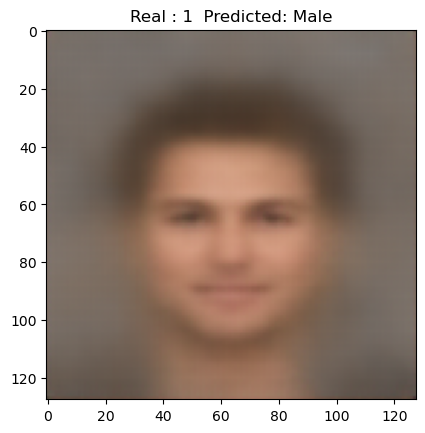

In [6]:
path1='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_128x128\\no_crop'
label = gender_recogn(base_path=path1, img_size=64,attribute=[1,1,0,0,0,0], display=1)
print(label)

In [7]:
def test_model(numberOfSamples=10, attr = [1,1,0,0,0,0]):
    path1='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\CGAN_128x128\\no_crop'
    sum = 0
    for i in range(numberOfSamples):
        label = gender_recogn(base_path=path1, img_size=128, attribute=attr,display=2)
        sum += label[0]
    
    accuracy = (sum / numberOfSamples) * 100

    return accuracy


acc = test_model(numberOfSamples=100, attr=[1,0,0,0,0,0])
print(f"Accuracy  - Male attribute + Young: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,0,0,0,0,0])
print(f"Accuracy  - Female attribute + Young: {acc} %")

acc = test_model(numberOfSamples=100, attr=[1,1,1,0,0,0])
print(f"Accuracy  - Male attribute + Glasses: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,1,1,0,0,0])
print(f"Accuracy  - Female attribute + Glasses: {acc} %")

acc = test_model(numberOfSamples=100, attr=[1,1,0,1,0,0])
print(f"Accuracy  - Male attribute + Bangs: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,1,0,1,0,0])
print(f"Accuracy  - Female attribute + Bangs: {acc} %")

acc = test_model(numberOfSamples=100, attr=[1,1,0,0,1,0])
print(f"Accuracy  - Male attribute + Black: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,1,0,0,1,0])
print(f"Accuracy  - Female attribute + Black: {acc} %")

acc = test_model(numberOfSamples=100, attr=[1,1,0,0,0,1])
print(f"Accuracy  - Male attri bute + Gray: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,1,0,0,0,1])
print(f"Accuracy  - Female attribute + Gray: {acc} %")

Accuracy  - Male attribute + Young: 90.61858278512955 %
Accuracy  - Female attribute + Young: 93.84349066019058 %
Accuracy  - Male attribute + Glasses: 76.85191208124161 %
Accuracy  - Female attribute + Glasses: 91.53860414028168 %
Accuracy  - Male attribute + Bangs: 79.97050642967224 %
Accuracy  - Female attribute + Bangs: 96.18907338380814 %
Accuracy  - Male attribute + Black: 88.70629215240479 %
Accuracy  - Female attribute + Black: 93.9991746544838 %
Accuracy  - Male attri bute + Gray: 92.41620939970016 %
Accuracy  - Female attribute + Gray: 88.13817620277405 %


## A2F-noise

In [8]:
## MODELS ##
from Models.A2F_64x64.Discriminator_Stage2 import Discriminator as Discriminator_S2
from Models.A2F_64x64.Generator_Stage2 import Generator as Generator_S2
from Models.A2F_64x64.Discriminator_Stage3 import Discriminator as Discriminator_S3
from Models.A2F_64x64.Generator_Stage3 import Generator as Generator_S3
from Models.A2F_64x64.CVAE_Encoder import Encoder
from Models.A2F_64x64.CVAE_Decoder import Decoder
DEVICE = 'cuda'
from GenderRecognNetwork.network import CNN

image_shape = [3,128,128]

def init_models(base_path, attribute_dim=4, img_size=64):
    encoder = Encoder(attribute_number=attribute_dim)
    decoder = Decoder(attribute_number=attribute_dim)
    retea_G3 = Generator_S3(img_size=3, attribute_number=attribute_dim)
    retea_D3 = Discriminator_S3(img_size=img_size, attribute_number=attribute_dim)
    retea_G2 = Generator_S2(attribute_number=attribute_dim)
    retea_D2 = Discriminator_S2(img_size=img_size, attribute_number=attribute_dim)
    retea_G3.cuda()
    retea_D3.cuda()
    retea_G2.cuda()
    retea_D2.cuda()
    encoder.cuda()
    decoder.cuda()
    encoder.eval()
    decoder.eval()
    retea_G3.eval()
    retea_D3.eval()
    retea_G2.eval()
    retea_D2.eval()

    decoder.load_state_dict(torch.load(base_path + '\\retea_Decoder.pt'))
    encoder.load_state_dict(torch.load(base_path + '\\retea_Encoder.pt'))

    retea_D2.load_state_dict(torch.load(base_path + '\\retea_D_Stage2.pt'))
    retea_G2.load_state_dict(torch.load(base_path + '\\retea_G_Stage2.pt'))

    retea_D3.load_state_dict(torch.load(base_path + '\\A2F_retea_D_Stage3.pt'))
    retea_G3.load_state_dict(torch.load(base_path + '\\A2F_retea_G_Stage3.pt'))
    return encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3


base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_64x64'
encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3 = init_models(base_path=base_path)

def synth_images(base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_64x64', attribute=[0,0,0,1], img_size=64, display=0, stage=3):
    model = CNN(2, image_shape)
    model.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\GenderRecognNetwork\old_model.pt'))
    model.eval()

    transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize([128,128]),
            transforms.ToTensor()])

    sketch_img = torch.randn(3, img_size, img_size)
    esantioane_proba = torch.stack([sketch_img], dim=0)
    attributes = torch.FloatTensor([attribute])

    esantioane_proba = esantioane_proba.to(torch.device(DEVICE))
    attributes = attributes.to(torch.device(DEVICE))
    zgomot_proba = torch.FloatTensor(esantioane_proba.shape[0], 256).normal_(0, 1)
    zgomot_proba  = zgomot_proba.to(torch.device(DEVICE))

    zgomot_embedded, schita_embedded, encode_text = encoder(noise=zgomot_proba, attr_text=attributes, sketch=esantioane_proba, detach_flag=True)
    reconstructed_sketch_images, reconstructed_fake_images = decoder(zgomot_embedded[0], schita_embedded[0], detach_flag=True)

    imagini_generate_Stage2 = retea_G2(reconstructed_fake_images, encode_text).detach()
    imagini_generate_Stage3 = retea_G3(imagini_generate_Stage2, attributes).detach()

    imagini_generate_Stage3 = torch.squeeze(imagini_generate_Stage3, 0)
    imagini_generate_Stage3 = imagini_generate_Stage3.to(torch.device('cpu'))

    img_generata = np.transpose(imagini_generate_Stage3,(1,2,0))
    input_image = transform(imagini_generate_Stage3)

    input_image = input_image.view(1,input_image.size(0),input_image.size(1),input_image.size(2))

    output = model.forward(input_image)
    output = output.detach().numpy()

    predicted_label_index = np.argmax(output, axis=1)
    # predicted_label = output.detach().numpy()
    predicted_label = output[0][predicted_label_index]
    test_image_predicted_label = "Male" if predicted_label_index == 1 else "Female" 

    if display == 1:
            ic(output)
            ic(predicted_label)
            ic(predicted_label_index)
            plt.figure()
            plt.imshow(img_generata)
            plt.title("Real : {}  Predicted: {}".format(attribute[0], test_image_predicted_label))
    
            return predicted_label  
    if display == 2:
            return predicted_label  

    if display == 0:
            return predicted_label_index
    
synth_images()

Using cache found in C:\Users\Teodora/.cache\torch\hub\pytorch_vision_v0.10.0


array([0], dtype=int64)

ic| output: array([[0.9068784, 0.4360097]], dtype=float32)
ic| predicted_label: array([0.9068784], dtype=float32)
ic| predicted_label_index: array([0], dtype=int64)


[0.9068784]


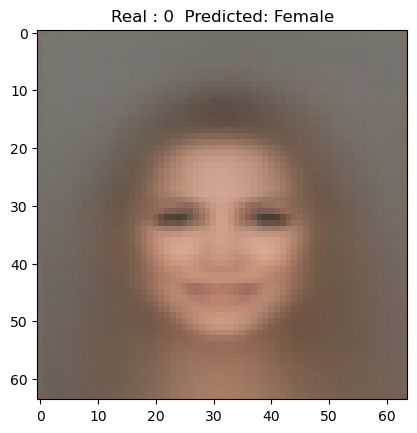

In [9]:
label = synth_images(attribute=[0,0,0,0] ,display=1)
print(label)

In [10]:
def test_model(numberOfSamples=10, attr = [0,0,0,0]):
    sum = 0
    for i in range(numberOfSamples):
        label = synth_images(attribute=attr ,display=2)
        sum += label[0]
    
    accuracy = (sum / numberOfSamples) * 100

    return accuracy

acc = test_model(numberOfSamples=100, attr=[1,1,0,0])
print(f"Accuracy  - Male attribute + Smile: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,1,0,0])
print(f"Accuracy  - Female attribute + Smile: {acc} %")

acc = test_model(numberOfSamples=100, attr=[1,0,1,0])
print(f"Accuracy  - Male attribute + Glasses: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,0,1,0])
print(f"Accuracy  - Female attribute + Glasses: {acc} %")

acc = test_model(numberOfSamples=100, attr=[1,0,0,1])
print(f"Accuracy  - Male attribute + Glasses: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,0,0,1])
print(f"Accuracy  - Female attribute + Glasses: {acc} %")



Accuracy  - Male attribute + Smile: 91.52693516016006 %
Accuracy  - Female attribute + Smile: 89.84843492507935 %
Accuracy  - Male attribute + Glasses: 88.15456718206406 %
Accuracy  - Female attribute + Glasses: 81.03723067045212 %
Accuracy  - Male attribute + Glasses: 85.0420600771904 %
Accuracy  - Female attribute + Glasses: 91.5291965007782 %


# A2F-sketch

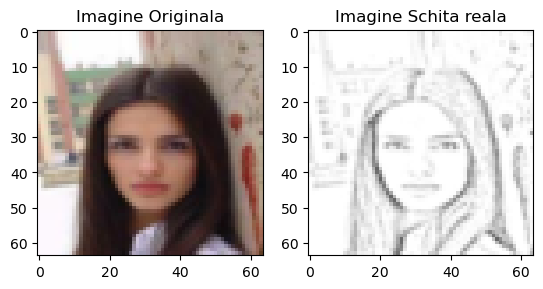

In [11]:
ATTR_DIM = 4
resize =  transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize([64,64])])

def read_images(index, display=1):
    EXCEL_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\celebA_medium.xlsx"
    DATASET_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\medium_dataset\\"
    SKETCH_DATASET_PATH = "E:\Lucru\Dizertatie\Cod\Face_Synthesis\Database\medium_dataset_sketch\\"

    resize =  transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize([64,64])])

    transf = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize([64,64]),
                                transforms.ToTensor()])

    transf_sketch = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.Resize([64,64]),
                                transforms.ToTensor()])

    df = pd.read_excel(EXCEL_PATH)
    data = df["image_id"]
    labels = df.iloc[:, 1:(ATTR_DIM + 1)]
    # labels = df["Male"]

    # index = 17

    # 25 - nice female
    # 31 - male

    img = cv2.imread(DATASET_PATH + data[index])
    # img = cv2.imread('E:\Lucru\Dizertatie\Cod\Image-to-Sketch\source\\Vaman_Teodora.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    sketch_img = cv2.imread(SKETCH_DATASET_PATH + data[index])
    # sketch_img = cv2.imread('E:\Lucru\Dizertatie\Cod\Image-to-Sketch\destination\\Vaman_Teodora.jpg')
    sketch_img = cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)

    batch_data = img
    batch_data = transf(batch_data)

    batch_sketch_data = sketch_img
    batch_sketch_data = transf_sketch(batch_sketch_data)

    batch_labels = labels.iloc[index].values
    pil_img = resize(img)
    pil_img_sketch = resize(sketch_img)
    if display == 1 :
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.title("Imagine Originala")
        plt.imshow(np.asarray(pil_img))
        plt.subplot(1, 2, 2)
        plt.imshow(np.asarray(pil_img_sketch))
        plt.title("Imagine Schita reala")

    # print(f"Attributes [Gender Smiling Eyeglasses No_Beard] = {labels.iloc[index].values}")
    # Gender Smiling Eyeglasses No_Beard
    return batch_sketch_data, batch_data, batch_labels, np.asarray(pil_img)

sketch_img, img, labels, show_img = read_images(25)

Using cache found in C:\Users\Teodora/.cache\torch\hub\pytorch_vision_v0.10.0
ic| output: array([[0.4651776 , 0.43135265]], dtype=float32)
ic| predicted_label: array([0.4651776], dtype=float32)
ic| predicted_label_index: array([0], dtype=int64)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([0.4651776], dtype=float32)

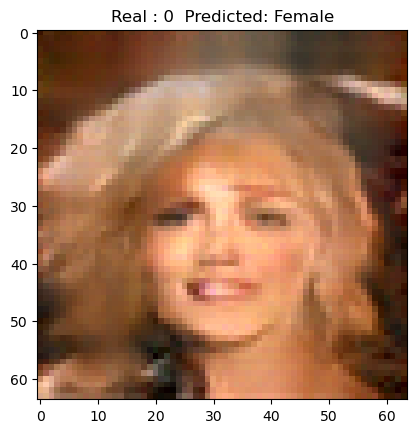

In [12]:
## MODELS ##
from Models.A2F_64x64.Discriminator_Stage2 import Discriminator as Discriminator_S2
from Models.A2F_64x64.Generator_Stage2 import Generator as Generator_S2
from Models.A2F_64x64.Discriminator_Stage3 import Discriminator as Discriminator_S3
from Models.A2F_64x64.Generator_Stage3 import Generator as Generator_S3
from Models.A2F_64x64.CVAE_Encoder import Encoder
from Models.A2F_64x64.CVAE_Decoder import Decoder
DEVICE = 'cuda'
from GenderRecognNetwork.network import CNN

image_shape = [3,128,128]

def init_models(base_path, attribute_dim=4, img_size=64):
    encoder = Encoder(attribute_number=attribute_dim)
    decoder = Decoder(attribute_number=attribute_dim)
    retea_G3 = Generator_S3(img_size=3, attribute_number=attribute_dim)
    retea_D3 = Discriminator_S3(img_size=img_size, attribute_number=attribute_dim)
    retea_G2 = Generator_S2(attribute_number=attribute_dim)
    retea_D2 = Discriminator_S2(img_size=img_size, attribute_number=attribute_dim)
    retea_G3.cuda()
    retea_D3.cuda()
    retea_G2.cuda()
    retea_D2.cuda()
    encoder.cuda()
    decoder.cuda()
    encoder.eval()
    decoder.eval()
    retea_G3.eval()
    retea_D3.eval()
    retea_G2.eval()
    retea_D2.eval()

    decoder.load_state_dict(torch.load(base_path + '\\retea_Decoder.pt'))
    encoder.load_state_dict(torch.load(base_path + '\\retea_Encoder.pt'))

    retea_D2.load_state_dict(torch.load(base_path + '\\retea_D_Stage2.pt'))
    retea_G2.load_state_dict(torch.load(base_path + '\\retea_G_Stage2.pt'))

    retea_D3.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_sketch\A2F_retea_D_stage3.pt'))
    retea_G3.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_sketch\A2F_retea_G_stage3.pt'))
    return encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3


base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_64x64'
encoder, decoder, retea_D2, retea_G2, retea_D3, retea_G3 = init_models(base_path=base_path)

def synth_images(base_path='E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\Pretrained\A2F_64x64', attribute=[0,0,0,1], img_size=64, display=0, stage=3):
    model = CNN(2, image_shape)
    model.load_state_dict(torch.load('E:\Lucru\Dizertatie\Cod\EvaluatingPerformance\GenderRecognNetwork\old_model.pt'))
    model.eval()

    transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize([128,128]),
            transforms.ToTensor()])
    

    random_index = random.randint(0, 80000)
    sketch_img, img, labels, show_img = read_images(index=random_index, display=0)

#     sketch_img = torch.randn(3, img_size, img_size)
    esantioane_proba = torch.stack([sketch_img], dim=0)
    attributes = torch.FloatTensor([attribute])

    esantioane_proba = esantioane_proba.to(torch.device(DEVICE))
    attributes = attributes.to(torch.device(DEVICE))
    zgomot_proba = torch.FloatTensor(esantioane_proba.shape[0], 256).normal_(0, 1)
    zgomot_proba  = zgomot_proba.to(torch.device(DEVICE))

    zgomot_embedded, schita_embedded, encode_text = encoder(noise=zgomot_proba, attr_text=attributes, sketch=esantioane_proba, detach_flag=True)
    reconstructed_sketch_images, reconstructed_fake_images = decoder(zgomot_embedded[0], schita_embedded[0], detach_flag=True)

    imagini_generate_Stage2 = retea_G2(reconstructed_sketch_images, encode_text).detach()
    imagini_generate_Stage3 = retea_G3(imagini_generate_Stage2, attributes).detach()

    imagini_generate_Stage3 = torch.squeeze(imagini_generate_Stage3, 0)
    imagini_generate_Stage3 = imagini_generate_Stage3.to(torch.device('cpu'))

    img_generata = np.transpose(imagini_generate_Stage3,(1,2,0))
    input_image = transform(imagini_generate_Stage3)

    input_image = input_image.view(1,input_image.size(0),input_image.size(1),input_image.size(2))

    output = model.forward(input_image)
    output = output.detach().numpy()

    predicted_label_index = np.argmax(output, axis=1)
    # predicted_label = output.detach().numpy()
    predicted_label = output[0][predicted_label_index]
    test_image_predicted_label = "Male" if predicted_label_index == 1 else "Female" 

    if display == 1:
            ic(output)
            ic(predicted_label)
            ic(predicted_label_index)
            plt.figure()
            plt.imshow(img_generata)
            plt.title("Real : {}  Predicted: {}".format(attribute[0], test_image_predicted_label))
    
            return predicted_label  
    if display == 2:
            return predicted_label  

    if display == 0:
            return predicted_label_index
    
synth_images(display=1)

In [13]:
def test_model(numberOfSamples=10, attr = [0,0,0,0]):
    sum = 0
    for i in range(numberOfSamples):
        label = synth_images(attribute=attr ,display=0)
        sum += (label == attr[0])
    
    accuracy = (sum / numberOfSamples) * 100

    return accuracy


# acc = test_model(numberOfSamples=100, attr=[1,0,0,1])
# print(f"Accuracy  - Male attribute: {acc} %")

# acc = test_model(numberOfSamples=100, attr=[0,0,0,1])
# print(f"Accuracy  - Female attribute: {acc} %")

# acc = test_model(numberOfSamples=100, attr=[1,1,0,1])
# print(f"Accuracy  - Male attribute + smile: {acc} %")

# acc = test_model(numberOfSamples=100, attr=[0,1,0,1])
# print(f"Accuracy  - Female attribute + smile: {acc} %")

# acc = test_model(numberOfSamples=100, attr=[1,0,1,1])
# print(f"Accuracy  - Male attribute + Glasses: {acc} %")

# acc = test_model(numberOfSamples=100, attr=[0,0,1,1])
# print(f"Accuracy  - Female attribute + Glasses: {acc} %")

acc = test_model(numberOfSamples=100, attr=[1,0,0,0])
print(f"Accuracy  - Male attribute + Beard: {acc} %")

acc = test_model(numberOfSamples=100, attr=[0,0,0,0])
print(f"Accuracy  - Female attribute + Beard: {acc} %")


KeyboardInterrupt: 